<a href="https://colab.research.google.com/github/vruddhis/sem6/blob/main/ml/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0]


<ipython-input-22-cf29b9dab154>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


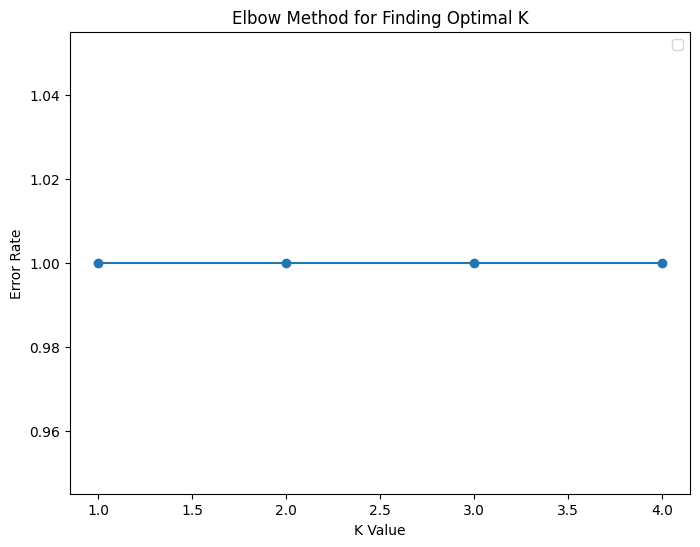

In [ ]:
def euclidean_square(point1, point2):
    n = len(point1)
    ans = 0
    for i in range(n):
        ans += (point1[i] - point2[i]) ** 2
    return ans



def knn(k, points, to_predict):
    distances = [[x[1],0] for x in points]
    for i in range(len(points)):
        distances[i][1] = euclidean_square(to_predict, points[i][0])
    distances.sort(key = lambda x: x[1])
    neighbours = [x[0] for x in distances[:k]]
    freq = {}
    for i in neighbours:
        if i not in freq:
            freq[i] = 0
        freq[i] += 1
    max_value = -1
    max_key = []
    for i in freq.keys():
        if freq[i] > max_value:
            max_key = [i]
            max_value = freq[i]
        elif freq[i] == max_value:
            max_key.append(i)
    return max_key


k = 3
to_predict = [30, 70]
points = [([70, 70], 0), ([70, 40], 1), ([30, 40], 0), ([10, 40], 0)]
print(knn(k, points, to_predict))

test_points = [([30, 70], [1])]
import matplotlib.pyplot as plt

def elbow_method(train_points, test_points, r):
    error = []
    for k in range(1, r):
        e = 0
        correct = 0
        wrong = 0
        for t in test_points:

            if t[1] in knn(k, train_points, t[0]):
                correct += 1
            else:
                wrong += 1
        e = 1 - correct / (correct + wrong)
        error.append(e)
    plt.figure(figsize=(8, 6))
    plt.plot(list(range(1, r)), error, marker='o')
    plt.xlabel('K Value')
    plt.ylabel('Error Rate')
    plt.title('Elbow Method for Finding Optimal K')
    plt.legend()
    plt.show()


elbow_method(points, test_points, 5)

In [ ]:
import csv

def convert_csv_to_array(filename):
  """Converts a CSV file into an array of tuples.

  Args:
    filename: The path to the CSV file.

  Returns:
    A list of tuples, where each tuple represents a row in the CSV file.
    Each tuple contains a list of the first n-1 elements of the row
    and the nth element of the row.
  """
  data = []
  with open(filename, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
      if row:  # Skip empty rows
        data.append(([float(x) for x in row[:-1]], float(row[-1])))
  return data

# Example usage:
filename = 'mobile_price_range_data.csv'  # Replace with your CSV file name
data_array = convert_csv_to_array(filename)


In [ ]:
n = len(data_array)
test_size = n // 4
test = data_array[:test_size]
train = data_array[test_size:]


<ipython-input-22-cf29b9dab154>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


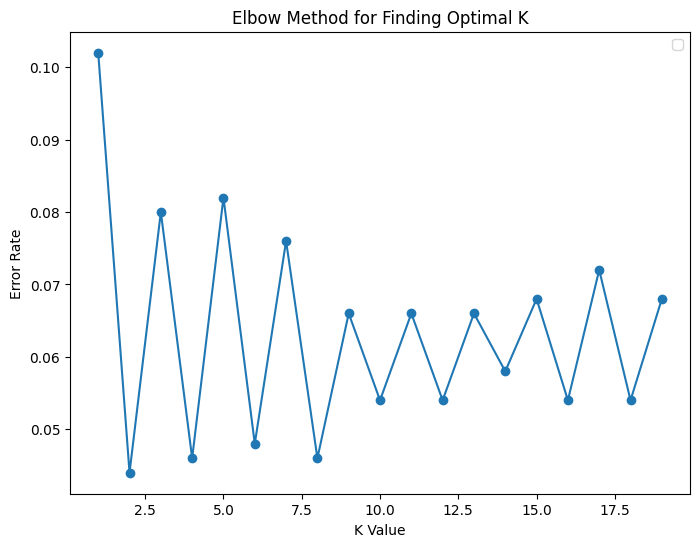

In [ ]:
elbow_method(train, test, 20)